In [1]:
import os
import tweepy as tw
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
consumer_key= 'qRbeWdEvZ0kZdQXfYET07e2Ep'
consumer_secret= 'hSjppkDMvnaqf0Tk8USRNtNWkCuEGAvxcGrAmo22TTp0yGh5ye'
access_token= '19154303-Hq0tF07yyHF96ozzpnaGyn7gxwoEYiLVtZDb9EfLJ'
access_token_secret= 'b6nQi5e8c58tJknAcMeuc5BdqNeOKcr8FyM95phxWx68C'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
tweets_df2=pd.read_csv("AirVistara.csv")

In [3]:
tweets_df2.head()

,Unnamed: 0,Tweet_Text,created,Twitter_screenname,Followers,id,location
0,0,RT @TrichyAviation: @STANLEY97783921 @TataComp...,2022-05-07 18:12:28+00:00,mi_habeeb,27,1.523000e+18,Namakkal
1,1,"RT @airvistara: Fly Daily Direct to Delhi, Mum...",2022-05-07 18:12:12+00:00,iam_KuttyPrem,262,1.523000e+18,Cuddalore_M.Pudhur
2,2,"RT @TrichyAviation: 🇸🇬 16,287 pax with 90% of ...",2022-05-07 18:11:46+00:00,mi_habeeb,27,1.523000e+18,Namakkal
3,3,I mostly tweet about bad experiences with bran...,2022-05-07 18:11:33+00:00,tirthankar_s,419,1.523000e+18,Mumbai
4,4,"@i_thyagarajubm @airvistara Coming to Mysuru, ...",2022-05-07 17:47:46+00:00,thestratink,41,1.523000e+18,NaN


In [4]:
import nltk
import re

In [19]:
#remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
#Adding custom stop words
new_words=[]
new_words = ["indigo","jm","hemendu","scindia","nan","airvistara","vistara","th","air","rt","airindiain","nmi","mkarthi","deepigoyal","gpwt","rt","zomato","zomatocare","some","one","like","time","br","movie","film","could","good",'even', 'get', 'would',
             'make', 'really', 'see', 'well', 'much', 'great', 'first', 'people', 'also', 'bad', 
             'show', 'way', 'thing', 'made', 'go', 'think', 'know', 'watch','look','many', 'covid', 'co','http', 'amp', 'vaccine', 'pandemic']
stop_words = stop_words.union(new_words)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'air',
 'airindiain',
 'airvistara',
 'all',
 'also',
 'am',
 'amp',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'bad',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'br',
 'but',
 'by',
 'can',
 'co',
 'could',
 'couldn',
 "couldn't",
 'covid',
 'd',
 'deepigoyal',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'even',
 'few',
 'film',
 'first',
 'for',
 'from',
 'further',
 'get',
 'go',
 'good',
 'gpwt',
 'great',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'hemendu',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'http',
 'i',
 'if',
 'in',
 'indigo',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'jm',
 'just',
 'know',
 'like',
 'll',
 'look',
 'm',
 'ma',
 'made',
 'make

In [20]:
#Stemming words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
#Lemmatisation
from nltk.stem.wordnet import WordNetLemmatizer 
lm = WordNetLemmatizer() 

In [21]:
type(tweets_df2['Tweet_Text'][0])

str

In [22]:
corpus = []
for i in range(0, tweets_df2.shape[0]):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(tweets_df2['Tweet_Text'][i]))
    
    #Convert to lowercase
    text = text.lower()
    ##Convert to list from string
    text = text.split()
    ##Lemmatizing
    lm = WordNetLemmatizer() 
       
    
    text = [lm.lemmatize(word) for word in text if not word in stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
#ignore words that appear in 80% of documents, 
#eliminate stop words
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, ngram_range=(1,2), min_df=0.001)
X=cv.fit_transform(corpus)
vector = cv.transform(corpus)

In [25]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

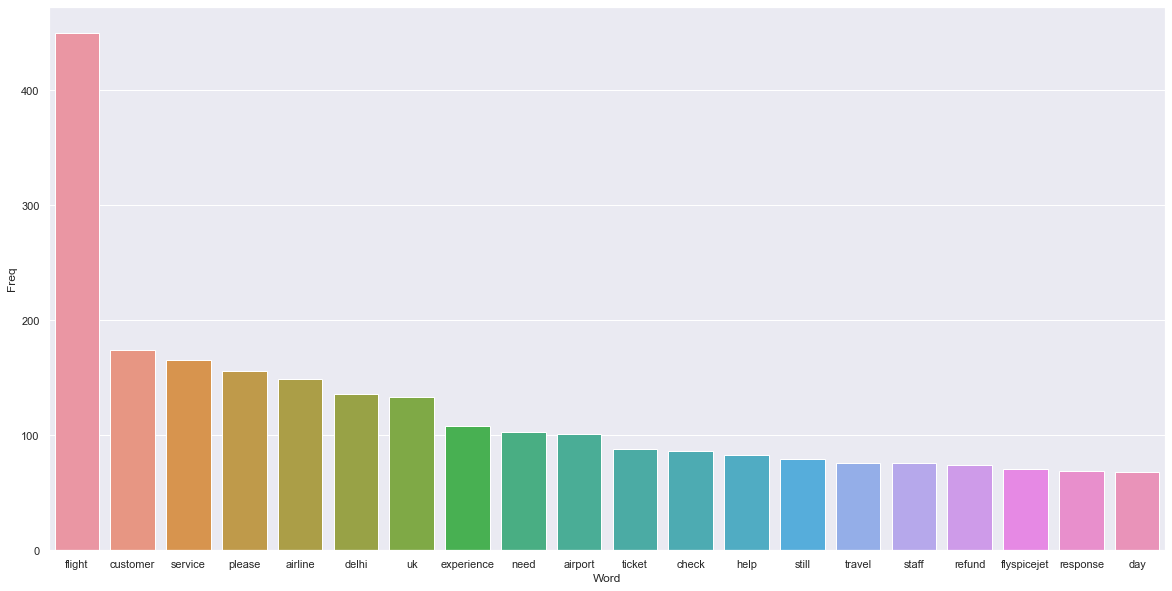

In [27]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Word", y="Freq",data=top_df)
plt.show()

In [14]:
#Visualise using word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from wordcloud import WordCloud

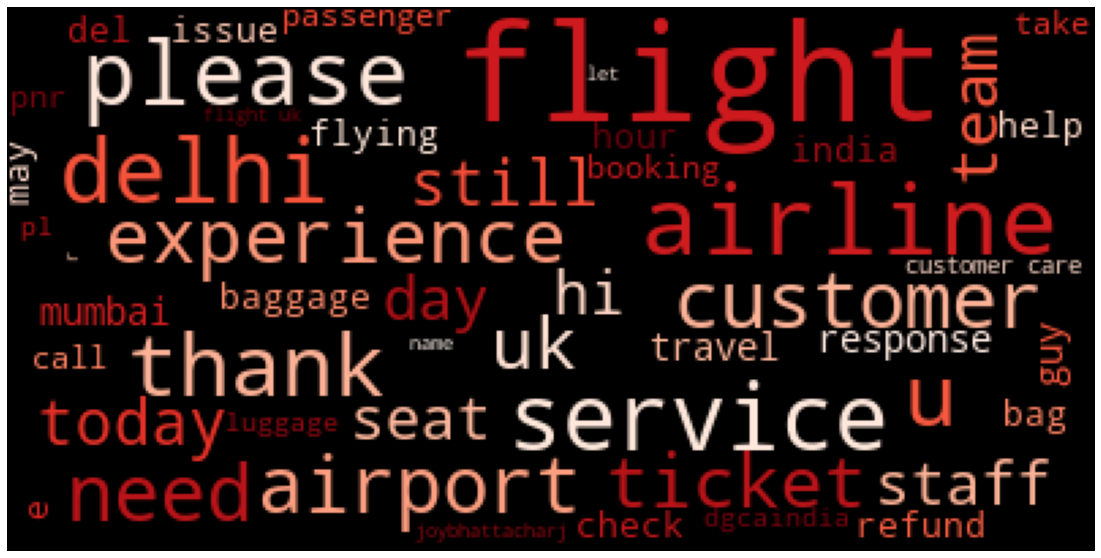

In [29]:
# Create and generate a word cloud image:
wordcloud = WordCloud(
                          background_color='black',
                          colormap="Reds",
                          stopwords=stop_words,
                          max_words=50,
                          max_font_size=50, 
                          random_state=42,
                          ).generate(str(corpus))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [30]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=15)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

                       Bi-gram  Freq
0                customer care    41
1                    flight uk    39
2             customer service    34
3                  please help    23
4                     moca goi    23
5                direct flight    22
6                still waiting    18
7                 aai official    16
8                 ground staff    16
9                 cjb aviation    15
10             domestic flight    15
11     cskkanu thesanjivkapoor    14
12  thesanjivkapoor geaviation    14
13       geaviation vaastavngo    14
14    vaastavngo sifchandigarh    14


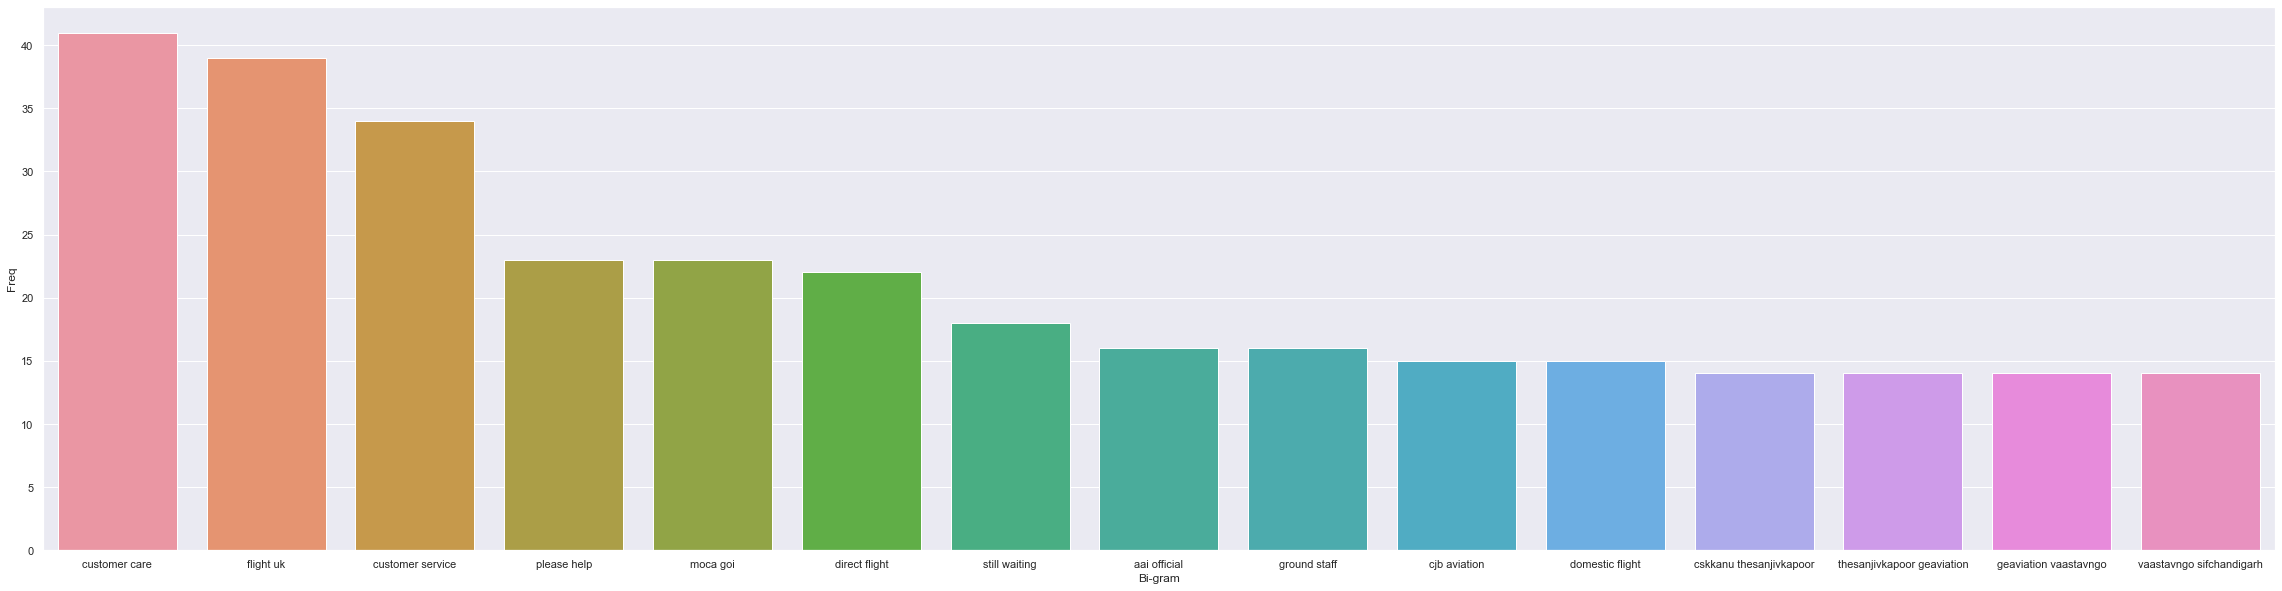

In [31]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x="Bi-gram", y="Freq",data=top2_df)
plt.show()

In [32]:
## Applying tf-idf vectoriser to the corpus
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the tf-idf model
tfv = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df = 0.00001)

In [33]:
# tokenize and build vocab
tfmat = tfv.fit_transform(corpus)
tfmat.shape

(1695, 20205)

In [34]:
feature_names=tfv.get_feature_names()

In [35]:
#Remove sparsity
dense = tfmat.todense()

In [36]:
#Convert the matrix to a list
corpus1 = dense[0].tolist()[0]

In [37]:
#Create a list of feature number and tf idf score - using pair iteration in list
phrase_scores = [pair for pair in zip(range(0, len(corpus1)), corpus1) if pair[1] > 0]

In [38]:
#Sort by second item in list - -1 for descending order
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
sorted_phrase_scores[:10]

[(18476, 0.3060897628022779),
 (16765, 0.2900610101192353),
 (16766, 0.2900610101192353),
 (16277, 0.2698671699495856),
 (16282, 0.2698671699495856),
 (3174, 0.26265967642129406),
 (3175, 0.26265967642129406),
 (7077, 0.26265967642129406),
 (7078, 0.26265967642129406),
 (7131, 0.26265967642129406)]

In [39]:
#Get word instead of word id with score
phrase1=[]
scores=[]
for phrase, score in [(feature_names[word_id], score) 
                      for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))
   phrase1.append(phrase)
   scores.append(score)

trichyaviation stanley 0.3060897628022779
stanley              0.2900610101192353
stanley tatacompanies 0.2900610101192353
singaporeair singaporecaas 0.2698671699495856
singaporecaas        0.2698671699495856
changiairport        0.26265967642129406
changiairport singaporeair 0.26265967642129406
flyscoot             0.26265967642129406
flyscoot changiairport 0.26265967642129406
flywithix flyscoot   0.26265967642129406
tatacompanies flywithix 0.26265967642129406
trichyaviation       0.23525834272335283
flywithix            0.22148916320918358
singaporeair         0.21506450255370307
tatacompanies        0.1666864958133011


In [40]:
tweets_df3=pd.DataFrame({'Words':np.array(phrase1),'TFID_Scores':np.array(scores)})

In [41]:
tweets_df3

,Words,TFID_Scores
0,trichyaviation stanley,0.306090
1,stanley,0.290061
2,stanley tatacompanies,0.290061
3,singaporeair singaporecaas,0.269867
4,singaporecaas,0.269867
5,changiairport,0.262660
6,changiairport singaporeair,0.262660
7,flyscoot,0.262660
8,flyscoot changiairport,0.262660
9,flywithix flyscoot,0.262660


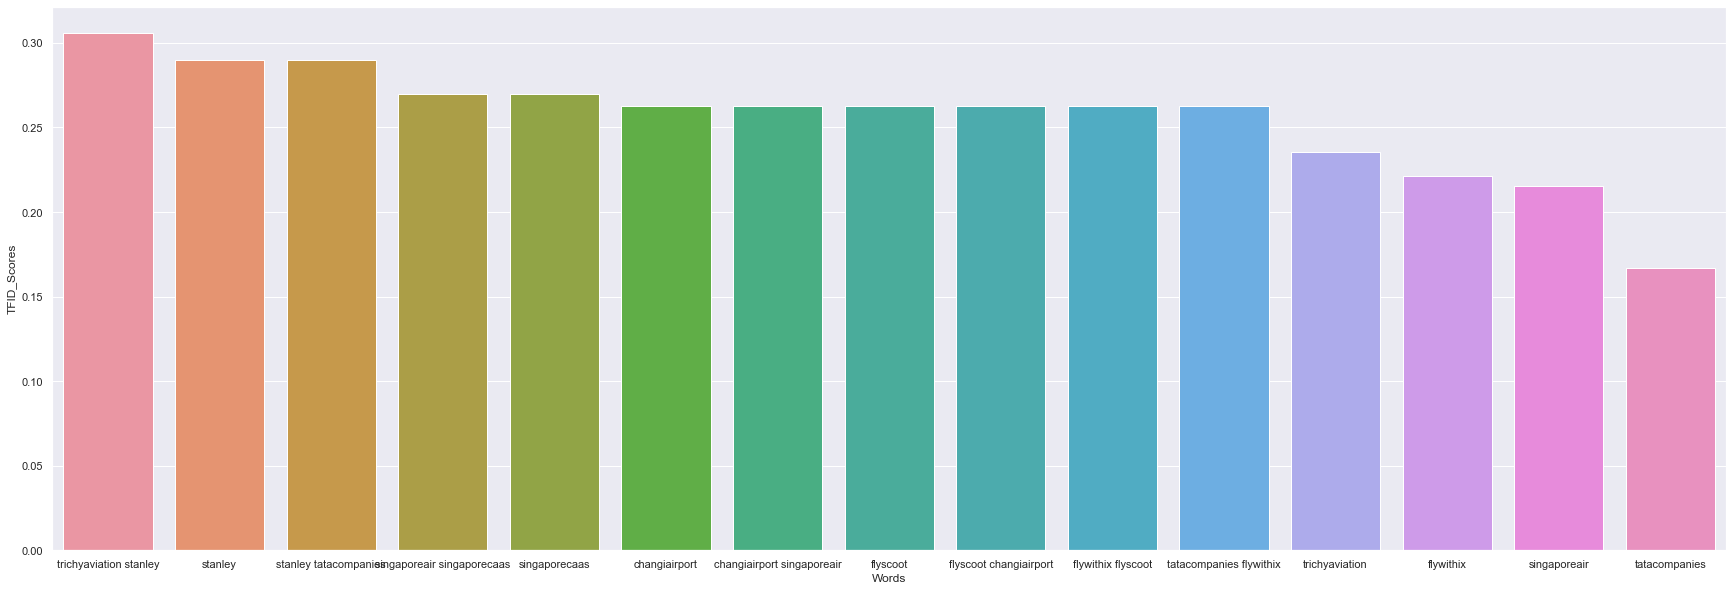

In [42]:
#Barplot of most freq words
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x="Words", y="TFID_Scores",data=tweets_df3)
plt.show()